In [171]:
#import libraries
#data analysis
import pandas as pd
import numpy as np

#visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
#loading data
df=pd.read_csv("kc_house_data.csv")

In [173]:
#preview
#columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [174]:
#head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [175]:
#describe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [240]:
#data type
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int32
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
grade_num          int32
dtype: object

In [177]:
#shape
df.shape

(21597, 21)

### Data Wrangling

#### Dealing with Missing Values

In [178]:
#missing values?
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [179]:
# filling waterfront missing values
#NO makes up 99.2% of all values
df.waterfront.value_counts()

#replace null with NO
df["waterfront"]=df["waterfront"].fillna("NO") #frequent substitution

In [180]:
#filling view missing values
df.view.value_counts()

#replace NA with NONE
df.view=df.view.fillna("NONE")

In [181]:
#most houses not renovated
df.yr_renovated.value_counts()

#replace missing values with 0-not renovated
df.yr_renovated=df.yr_renovated.fillna(0.0)

In [182]:
#still missing
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [183]:
#Text Categorical to Numeric: Waterfront
df=df.replace({'waterfront' : { 'YES' : 1, 'NO' : 0}})

In [184]:
#Text Categorical to Numeric: View
df=df.replace({'view' : { 'NONE' : 0, 'AVERAGE' : 1, "GOOD":2, "FAIR":3, "EXCELLENT":4}})


In [185]:
#Text Categorical to Numeric: Condition
df=df.replace({'condition' : { 'Poor' : 1, 'Fair' : 2, "Average" : 3,"Good": 4, "Very Good": 5}})

In [186]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

#### Spliting the Grade Column

In [190]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [208]:
#numerical grade
df['grade_num'] = df['grade'].str.split(' ',expand=True)

In [210]:
#new column, int type
df["grade_num"]=df['grade_num'].astype(int)

In [227]:
#drop old grade column
df=df.drop("grade",axis=1)

#### sqft_basement column cleaning

In [237]:
# we need to eliminate the ?
df.sqft_basement.value_counts()

0       13280
600       217
500       209
700       208
800       201
        ...  
2120        1
4820        1
2580        1
784         1
2610        1
Name: sqft_basement, Length: 303, dtype: int64

In [236]:
# replace with 0
df=df.replace({'sqft_basement':{"?":"0"}})

In [239]:
#change data type
df["sqft_basement"]=df["sqft_basement"].astype(int)

### How do features relate to the dependent variable

#### Correlation

<AxesSubplot:>

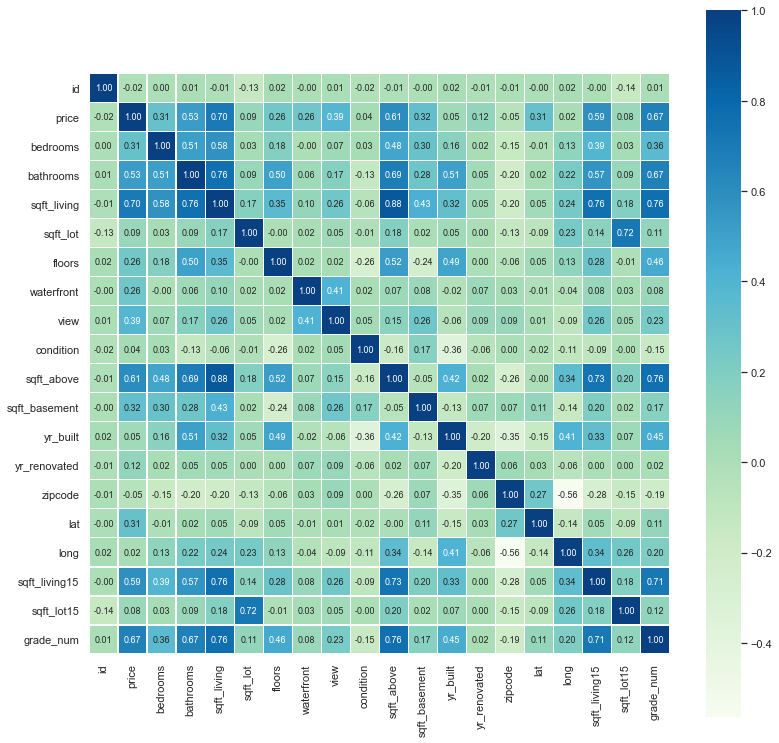

In [241]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),linewidth=0.25,square=True, cmap="GnBu", linecolor="w",annot=True,annot_kws={"size":9},fmt=".2f")

In [242]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.117855
floors           0.256804
waterfront       0.264306
lat              0.306692
bedrooms         0.308787
sqft_basement    0.321108
view             0.386430
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade_num        0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

#### Price vs Bathrooms

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

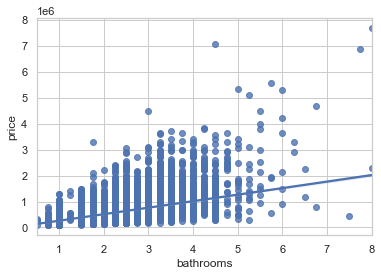

In [214]:
sns.regplot(y="price", x="bathrooms", data=df)

#### Price Vs living room square feet

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

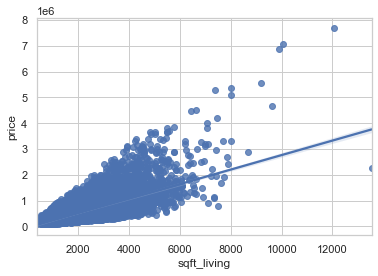

In [215]:
sns.regplot(y="price", x="sqft_living", data=df)

#### Price Vs sqfr_living15

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

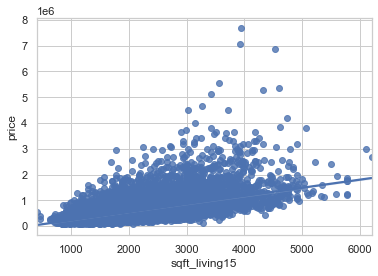

In [216]:
sns.regplot(y="price", x="sqft_living15",data=df)

#### Price Vs Grade

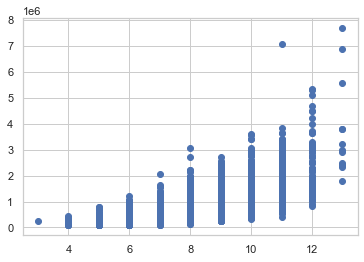

In [217]:
plt.scatter(y="price", x="grade_num",data=df)

### Model Development

In [218]:
# Linear Regression Module
from sklearn.linear_model import LinearRegression

In [219]:
#### Price Vs Grade
x=df[["grade_num"]]
y=df["price"]
lr=LinearRegression()
lr
lr.fit(x,y)
lr.score(x,y)

0.44615823299735036

In [220]:
#### Price Vs Bathrooms
x1=df[["bathrooms"]]
y1=df["price"]
lr=LinearRegression()
lr
lr.fit(x1,y1)
lr.score(x1,y1)

0.27657672267607736

In [221]:
#### Price Vs Square Feet Living
x2=df[["sqft_living"]]
y2=df["price"]
lr=LinearRegression()
lr
lr.fit(x2,y2)
lr.score(x2,y2)

0.49268789904035093

In [222]:
#### Price Vs Square Feet Above
x3=df[["sqft_above"]]
y3=df["price"]
lr=LinearRegression()
lr
lr.fit(x3,y3)
lr.score(x3,y3)

0.3664703472658384

In [223]:
#### Price Vs Square Living 15
x4=df[["sqft_living15"]]
y4=df["price"]
lr=LinearRegression()
lr
lr.fit(x4,y4)
lr.score(x4,y4)

0.3425072641720194

In [246]:
#combining the top 5 features most correlated to the price
features1=["sqft_living","grade_num","sqft_above","sqft_living15","grade_num"]

In [247]:
x5=df[features1]
y5=df["price"]
lr.fit(x5,y5)
lr.score(x5,y5)

0.5421716710679345

In [248]:
#using all features apart from date and id
df1=df.drop(["id","date","price"],axis=1)

In [251]:
x6=df1
y6=df["price"]
lr.fit(x6,y6)
lr.score(x6,y6)

0.7005668694002416

In [254]:
#defining X and Y
X = df['price']
train = df.drop(['id','date', 'price'],axis=1)

In [252]:
#relevant modules
from sklearn.model_selection import train_test_split

In [256]:
#spliting the dataset to train and test
x_train , x_test , y_train , y_test = train_test_split(train , X , test_size = 0.15,random_state =2)

In [258]:
#Training
lr.fit(x_train,y_train)

LinearRegression()

In [259]:
#Test
lr.score(x_test,y_test)

0.6895575489581175